In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os

def set_korean_font():
    candidates = ["Malgun Gothic", "맑은 고딕", "NanumGothic", "AppleGothic"]
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            plt.rcParams["font.family"] = name
            break
    plt.rcParams["axes.unicode_minus"] = False

set_korean_font()
sns.set_style("whitegrid")

def set_korean_font():
    import platform
    sys = platform.system()
    if sys == "Windows":
        plt.rcParams["font.family"] = "Malgun Gothic"
    elif sys == "Darwin":
        plt.rcParams["font.family"] = "AppleGothic"
    else:
        plt.rcParams["font.family"] = ["NanumGothic", "Noto Sans CJK KR", "DejaVu Sans"]
    plt.rcParams["axes.unicode_minus"] = False

set_korean_font()
# 저장 폴더
SAVE_DIR = "hour_bar_png"
os.makedirs(SAVE_DIR, exist_ok=True)

In [2]:
def load_csv(path):
    try:
        return pd.read_csv(path, encoding="cp949")
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="utf-8-sig")

df_h = load_csv("//192.168.0.230/data/suwon_data/수원시 한식 데이터백업.csv")
df_d = load_csv("//192.168.0.230/data/suwon_data/수원시 배달 데이터백업.csv")

df_h["TYPE"] = "한식"
df_d["TYPE"] = "배달"

df = pd.concat([df_h, df_d], ignore_index=True)


In [3]:
day_map = {0:"월",1:"화",2:"수",3:"목",4:"금",5:"토",6:"일"}

df["DAY_NAME"] = df["DAY"].map(day_map) if df["DAY"].dtype != object else df["DAY"].astype(str)
df["RAIN"] = pd.to_numeric(df["RAIN"], errors="coerce").fillna(0)
df["UNIT"] = pd.to_numeric(df["UNIT"], errors="coerce").fillna(0)

df["WEATHER"] = np.where(df["RAIN"] > 0, "비", "맑음")


C:\Users\Admin\AppData\Local\Temp\ipykernel_14916\4094751793.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


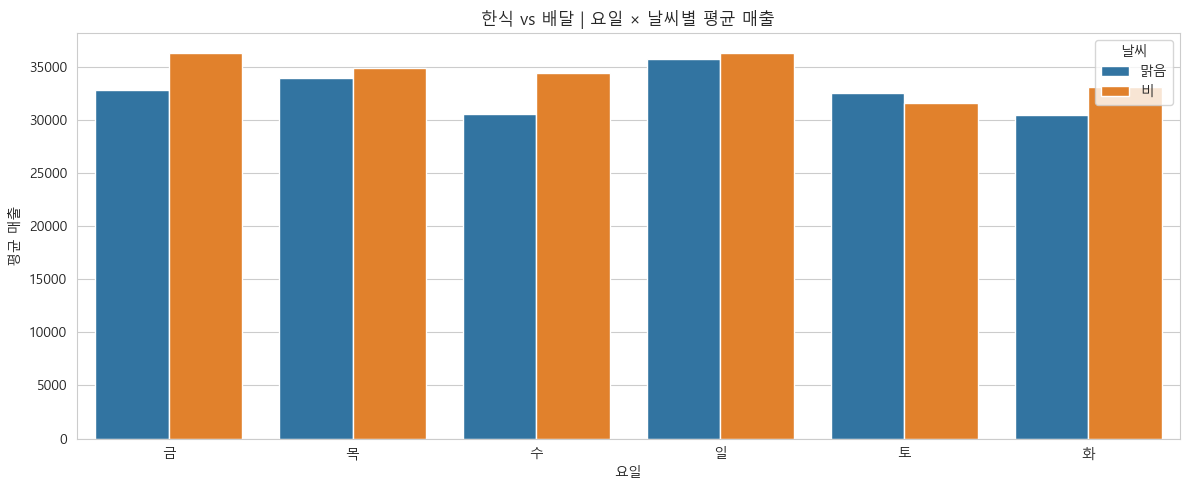

In [4]:
pivot = (
    df.groupby(["TYPE","DAY_NAME","WEATHER"], as_index=False)
      .agg(UNIT=("UNIT","mean"))
)

plt.figure(figsize=(12,5))
sns.barplot(
    data=pivot,
    x="DAY_NAME",
    y="UNIT",
    hue="WEATHER",
    ci=None
)
plt.title("한식 vs 배달 | 요일 × 날씨별 평균 매출")
plt.xlabel("요일")
plt.ylabel("평균 매출")
plt.legend(title="날씨")
plt.tight_layout()
plt.show()


In [5]:
rate = (
    pivot.pivot_table(
        index=["TYPE","DAY_NAME"],
        columns="WEATHER",
        values="UNIT"
    )
    .reset_index()
)

rate["증가율(%)"] = (rate["비"] - rate["맑음"]) / rate["맑음"] * 100
print(rate.round(1))


WEATHER TYPE DAY_NAME       맑음        비  증가율(%)
0         배달        금  33711.5  38041.4    12.8
1         배달        목  35884.3  37342.5     4.1
2         배달        수  29792.4  35015.1    17.5
3         배달        일  34735.0  35623.1     2.6
4         배달        토  32291.3  30313.1    -6.1
5         배달        화  30535.1  32308.6     5.8
6         한식        금  32024.2  34545.8     7.9
7         한식        목  32072.5  32400.9     1.0
8         한식        수  31407.5  33922.1     8.0
9         한식        일  36701.2  37061.6     1.0
10        한식        토  32747.0  32808.9     0.2
11        한식        화  30363.5  33859.5    11.5


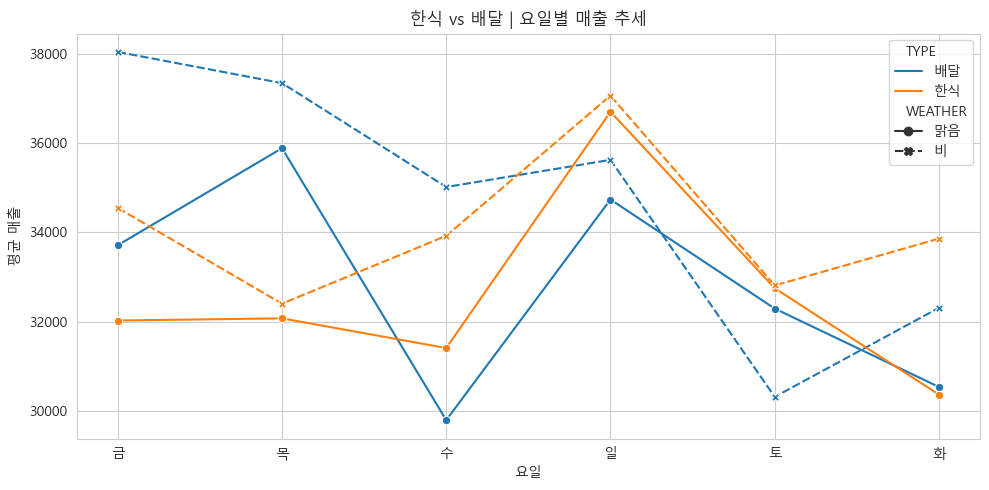

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=pivot,
    x="DAY_NAME",
    y="UNIT",
    hue="TYPE",
    style="WEATHER",
    markers=True
)
plt.title("한식 vs 배달 | 요일별 매출 추세")
plt.xlabel("요일")
plt.ylabel("평균 매출")
plt.tight_layout()
plt.show()


In [7]:
agg = (
    df.groupby(["TYPE", "WEATHER", "DAY_NAME", "HOUR"], as_index=False)
      .agg(UNIT=("UNIT", "mean"))
)


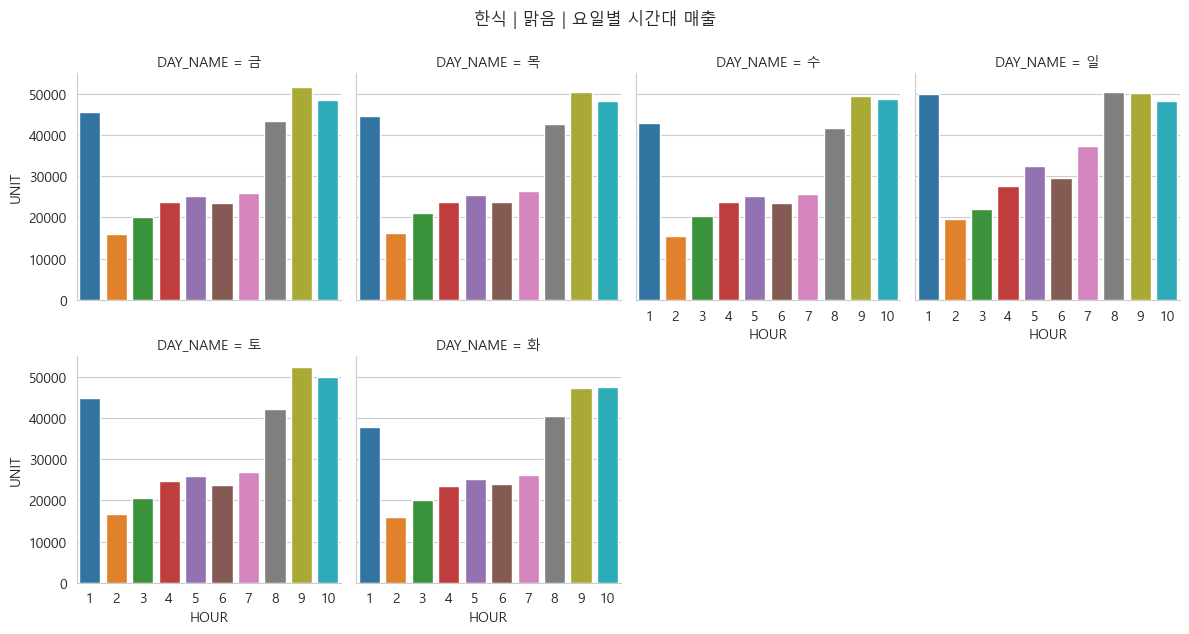

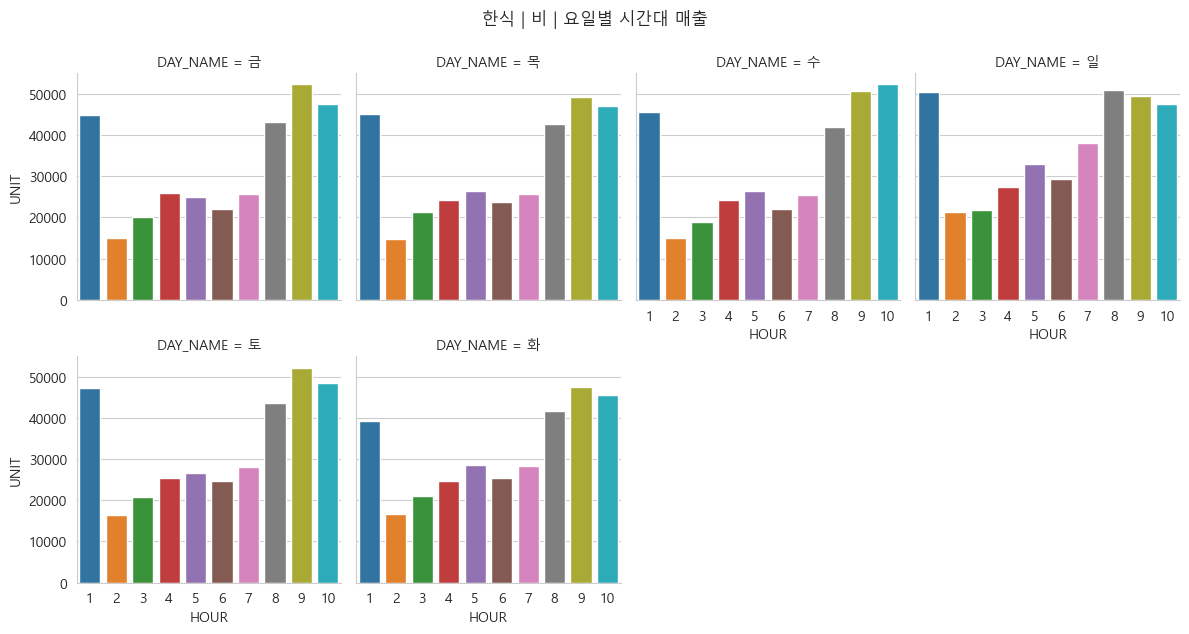

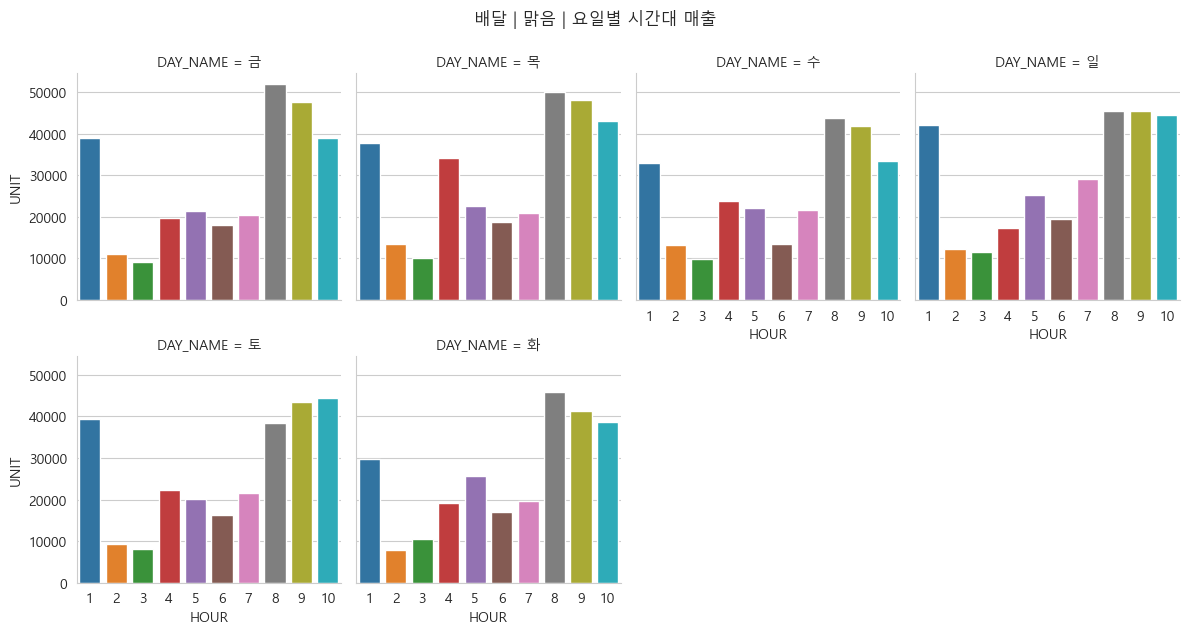

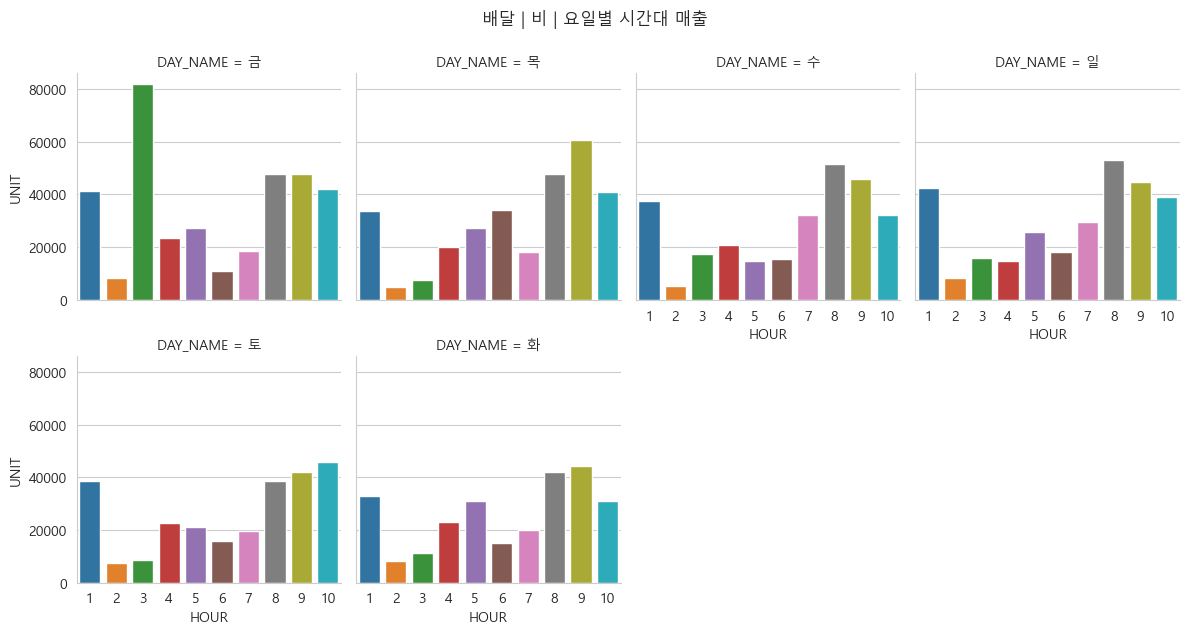

In [8]:
for t in ["한식", "배달"]:
    for w in ["맑음", "비"]:
        g = sns.catplot(
            data=agg[(agg["TYPE"]==t) & (agg["WEATHER"]==w)],
            x="HOUR",
            y="UNIT",
            col="DAY_NAME",
            col_wrap=4,
            kind="bar",
            height=3,
            aspect=1
        )
        g.fig.suptitle(f"{t} | {w} | 요일별 시간대 매출", y=1.05)
        plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14916\1689785316.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


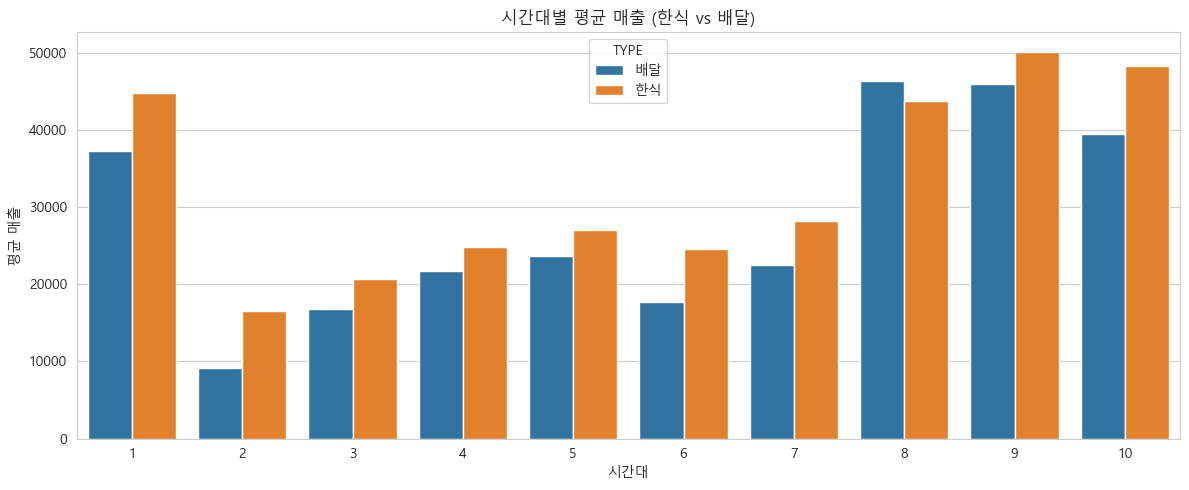

<Figure size 640x480 with 0 Axes>

In [9]:
summary = (
    agg.groupby(["TYPE","WEATHER","HOUR"], as_index=False)
       .agg(UNIT=("UNIT","mean"))
)

plt.figure(figsize=(12,5))
sns.barplot(
    data=summary,
    x="HOUR",
    y="UNIT",
    hue="TYPE",
    ci=None
)
plt.title("시간대별 평균 매출 (한식 vs 배달)")
plt.xlabel("시간대")
plt.ylabel("평균 매출")
plt.tight_layout()
plt.show()

plt.savefig("배달_비_요일별 추세.png", dpi=200, bbox_inches="tight")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14916\3989761023.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


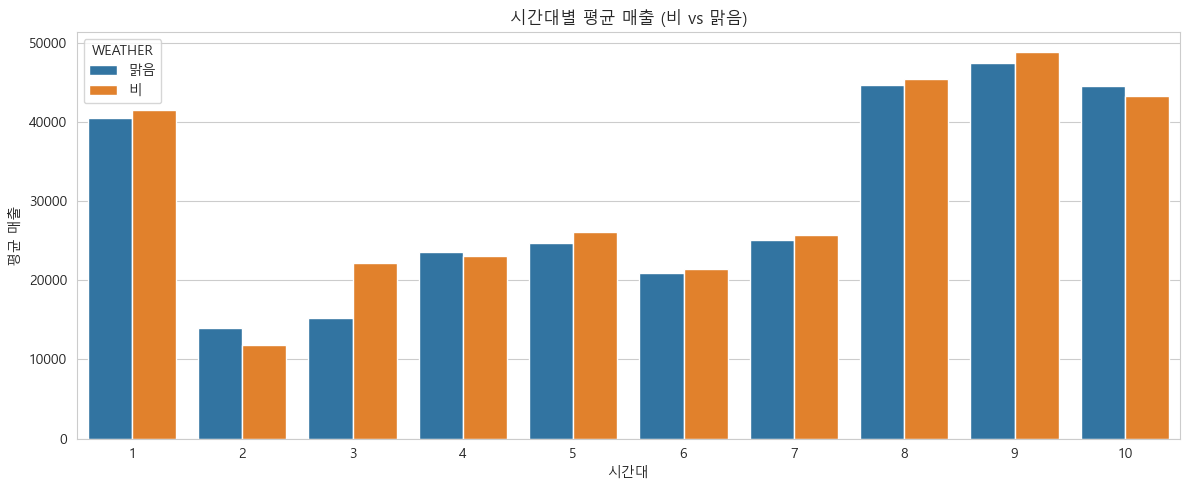

In [10]:
plt.figure(figsize=(12,5))
sns.barplot(
    data=summary,
    x="HOUR",
    y="UNIT",
    hue="WEATHER",
    ci=None
)
plt.title("시간대별 평균 매출 (비 vs 맑음)")
plt.xlabel("시간대")
plt.ylabel("평균 매출")
plt.tight_layout()
plt.show()


In [11]:
for t in ["한식", "배달"]:
    for w in ["맑음", "비"]:
        for day in ["월","화","수","목","금","토","일"]:

            sub = agg[
                (agg["TYPE"] == t) &
                (agg["WEATHER"] == w) &
                (agg["DAY_NAME"] == day)
            ]

            if sub.empty:
                continue

            plt.figure(figsize=(8,4))
            sns.barplot(
                data=sub,
                x="HOUR",
                y="UNIT"
            )

            plt.title(f"{t} | {day} | {w} | 시간대별 평균 매출")
            plt.xlabel("시간대")
            plt.ylabel("평균 매출")

            filename = f"{t}_{day}_{w}_시간대_매출.png"
            plt.savefig(
                os.path.join(SAVE_DIR, filename),
                dpi=200,
                bbox_inches="tight"
            )
            plt.close()
